# Introduction to Plotting

*Written by Luke Chang & Jin Cheong*

In this lab, we will introduce the basics of plotting in python using the `matplotlib` and `seaborn` packages. Matlotlib is probably the most popular python package for 2D graphics and has a nice tradeoff between ease of use and customizability. We will be working with the `pyplot` interface, which is an object-oriented plotting library based on plotting in Matlab. Many graphics libraries are built on top of matplotlib, and have tried to make plotting even easier. One library that is very nice to generate plots similar to how analyses are performed is [seaborn](https://seaborn.pydata.org/examples/index.html). There are many great tutorials online. Here are a few that I found to be helpful from [neurohackademy](https://github.com/neurohackademy/visualization-in-python/blob/master/visualization-in-python.ipynb), [Jake Vanderplas](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb), and [rougier](https://github.com/rougier/matplotlib-tutorial).


## Matplotlib
### Key Concepts
There are a few different types of concepts in the `matplotlib.pyplot` framework.
- `Figure`: Essentially the canvas, which contains the plots
- `Axes`: An individual plot within a figure. Each Axes has a title, an x-label, and a y-label
- `Axis`: These contain the graph limits and tickmarks
- `Artist`: Everything that is visiable on the figure is an artist (e.g., Text objects, Line2D object, collection objects). Artists are typically tied to a specific Axes.

**Note**: `%matplotlib inline` is an example of 'cell magic' and enables plotting *within* the notebook and not opening a separate window. In addition, you may want to try using `%matplotlib notebook`, which will allow more interactive plotting.

Let's get started by loading the modules we will use for this tutorial.

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lineplot
First, let's generate some numbers and create a basic lineplot.

In this example, we plot:

$y = x^2$ 

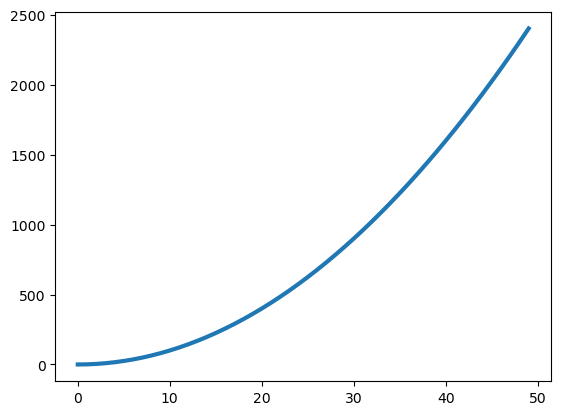

In [2]:
x = np.arange(0, 50, 1)
y = x ** 2

plt.plot(x, y, linewidth=3)

### Scatterplot
We can also plot associations between two different variables using a scatterplot. In this example, we will simulate correlated data with $\mathcal{N}(0,1)$ using `np.random.multivariate_normal` and create a scatterplot. Try playing with the covariance values to change the degree of association.



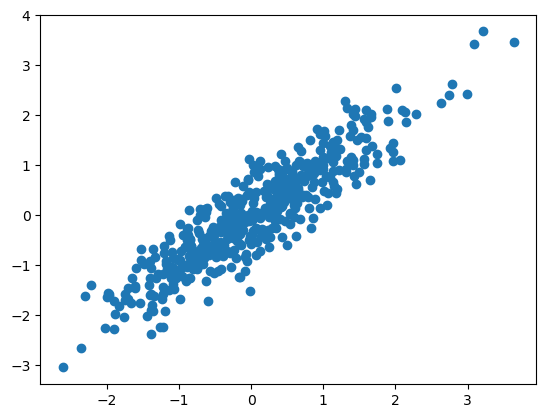

In [3]:
n = 500
r = .9
mu = np.array([0, 0])
cov = np.array([
    [1, r],
    [r, 1]])
data = np.random.multivariate_normal(mu, cov, size=n)

plt.scatter(data[:,0], data[:,1])

### Histogram
We can also plot the distribution of a variable using a histogram.

Let's see if the data we simulated above are actually normally distributed.

(array([  6.,  32.,  78., 111., 120.,  90.,  44.,  12.,   4.,   3.]),
 array([-2.6121582 , -1.98700614, -1.36185408, -0.73670202, -0.11154995,
         0.51360211,  1.13875417,  1.76390623,  2.38905829,  3.01421036,
         3.63936242]),
 <BarContainer object of 10 artists>)

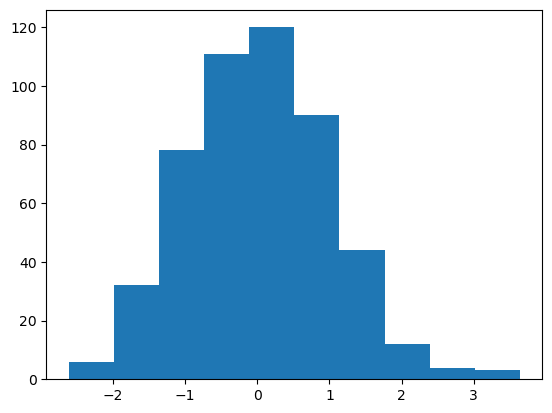

In [4]:
plt.hist(data[:,0])

We can also plot overlaying histograms. Let's simulate more data, but shift the mean of one by 3.

(array([[ 19.,  41., 145., 146., 113.,  32.,   4.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   5.,  29.,  97., 164., 132.,  60.,  13.]]),
 array([-2.91210633, -2.02752013, -1.14293392, -0.25834771,  0.6262385 ,
         1.5108247 ,  2.39541091,  3.27999712,  4.16458333,  5.04916953,
         5.93375574]),
 <a list of 2 BarContainer objects>)

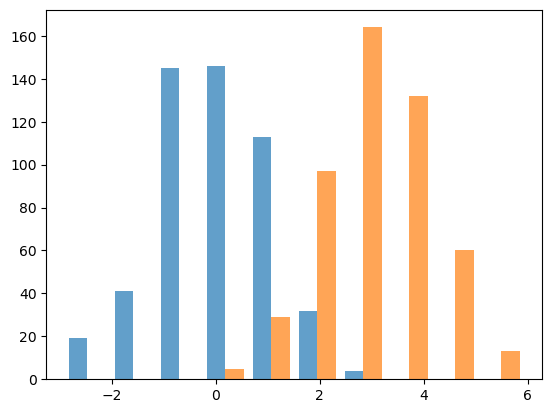

In [5]:
r = .9
mu = np.array([0, 3])
cov = np.array([
    [1, r],
    [r, 1]])
data = np.random.multivariate_normal(mu, cov, size=n)

plt.hist(data, alpha=.7)

### Bar Plot
We can also plot the same data as a bar plot to emphasize the difference in the means of the distributions. To create a bar plot, we need to specify the bar names and the heights of the bars.

<BarContainer object of 2 artists>

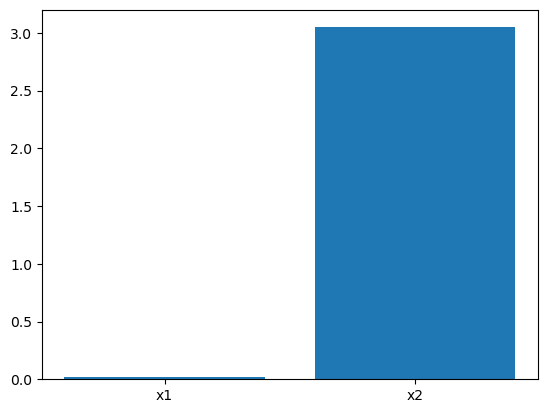

In [6]:
plt.bar(['x1','x2'], np.mean(data, axis=0))

### 3D Plots
We can also plot in 3 dimensions with `mplot3d`. Here we will simulate 3 different variables with different correlations.

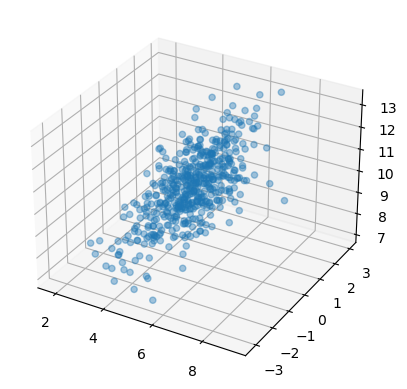

In [7]:
from mpl_toolkits import mplot3d

n = 500

r1 = .1
r2 = .5
r3 = .9

mu = np.array([5.0, 0.0, 10.0])

cov = np.array([
        [  1, r1, r2],
        [ r1,  1,  r3],
        [ r2,  r3,  1]
    ])
data = np.random.multivariate_normal(mu, cov, size=n)


ax = plt.axes(projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], alpha=.4)

### Customization
One of the nice things about matplotlib is that everything is customizable.

Let's go back to our first scatterplot and show how we can customize it to make it easier to read. 

We can specify the type of `marker`, the `color`, the `alpha` transparency, and the size of the dots with `s`.

We can also label the axes with `xlabel` and `ylabel`, and add a `title`.

Finally, we can add text annotations, such as the strength of the correlation with `annotate`.

Text(-2, 2, 'r=0.9')

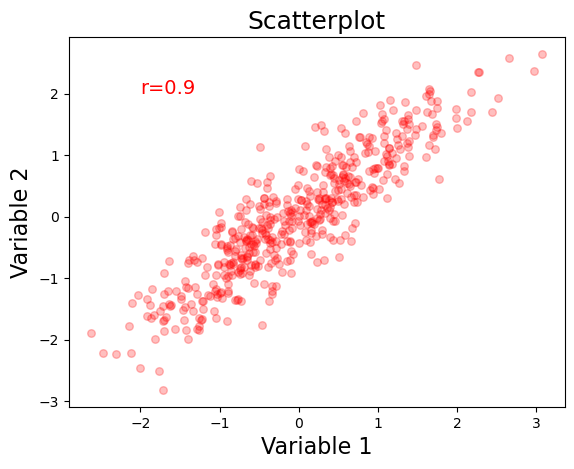

In [8]:
n = 500
r = .9
mu = np.array([0, 0])
cov = np.array([
    [1, r],
    [r, 1]])
data = np.random.multivariate_normal(mu, cov, size=n)

plt.scatter(data[:,0], data[:,1], color='r', marker='o', s=30, alpha=.25)

plt.xlabel('Variable 1', fontsize=16)
plt.ylabel('Variable 2', fontsize=16)
plt.title('Scatterplot', fontsize=18)
plt.annotate(f'r={r}', xy=(-2,2), xycoords='data', fontsize=14, color='red')

### Layouts

The easiest way to make customized layouts that can include multiple panels of a plot are with `subplot`. 

![subplot](../images/plotting/subplot.png)

There are two different ways to index. One is by adding a subplot. The first number is the number of rows, the second is the number of columns, and the third is the index number.

I personally prefer to index directly into the `ax` object with rows and columns as I find it more intuitive.

You can do even more advanced layouts with panels of different sizes using [gridspec](https://matplotlib.org/3.2.1/tutorials/intermediate/gridspec.html). 

Let's make our simulation code into a function and use subplots to plot multiple panels.

We specify the number of rows and columns when we initialize the plot. We can also play with the size of the plot. Here we tell matplotlib that the x and y axes will be shared across the different panels. Finally, `plt.tight_layout()` helps keep everything formatted and organized nicely.

When modifying `axes` we need to use the `set_{}` command rather than just the command itself. For example, `ax[0,0].set_xlabel('X')` rather than `plt.xlabel('X')`.

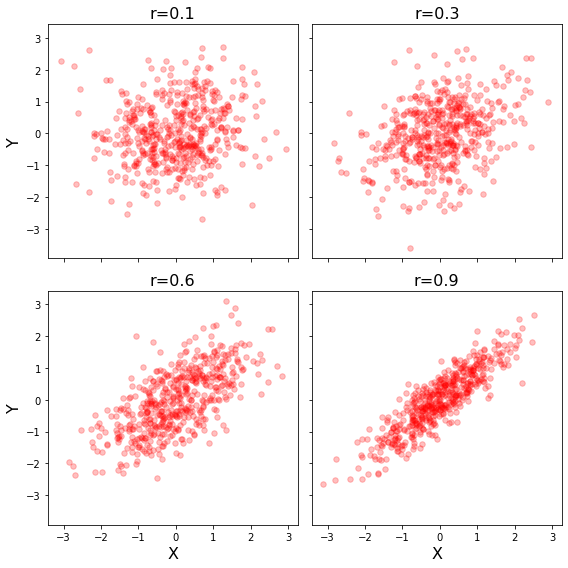

In [77]:
def simulate_xy(n=500, r=.9):
    mu = np.array([0, 0])
    cov = np.array([
        [1, r],
        [r, 1]])
    return np.random.multivariate_normal(mu, cov, size=n)

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True) 

r=.1
sim1 = simulate_xy(n=500, r=r)
ax[0,0].scatter(sim1[:,0], sim1[:,1], color='r', marker='o', s=30, alpha=.25)
ax[0,0].set_title(f'r={r}', fontsize=16)
ax[0,0].set_ylabel('Y', fontsize=16)

r=.3
sim1 = simulate_xy(n=500, r=r)
ax[0,1].scatter(sim1[:,0], sim1[:,1], color='r', marker='o', s=30, alpha=.25)
ax[0,1].set_title(f'r={r}', fontsize=16)

r=.6
sim1 = simulate_xy(n=500, r=r)
ax[1,0].scatter(sim1[:,0], sim1[:,1], color='r', marker='o', s=30, alpha=.25)
ax[1,0].set_title(f'r={r}', fontsize=16)
ax[1,0].set_xlabel('X', fontsize=16)
ax[1,0].set_ylabel('Y', fontsize=16)

r=.9
sim1 = simulate_xy(n=500, r=r)
ax[1,1].scatter(sim1[:,0], sim1[:,1], color='r', marker='o', s=30, alpha=.25)
ax[1,1].set_title(f'r={r}', fontsize=16)
ax[1,1].set_xlabel('X', fontsize=16)

plt.tight_layout()


### Saving Plots
Plots can be saved to disk using the `savefig` command. There are lots of ways to customize the saved plot. I typically save rasterized versions as `.png` and vectorized versions as `.pdf`. Don't forget to specify a path where you want the file written to.

In [74]:
plt.savefig('MyFirstPlot.png')

plt.savefig('MyFirstPlot.pdf')

<Figure size 432x288 with 0 Axes>

## Seaborn
[Seaborn](https://seaborn.pydata.org/index.html) is a plotting library built on Matplotlib that has many pre-configured plots that are often used for visualization. 
Other great tutorials about seaborn are [here](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb)

Most seaborn plots can be customized using the standard matplotlib commands, though be sure to look at the docstrings first as often there are already keywords within each type of plot to do what you want.

### Scatterplots
There are many variants of each type of plot that you might like to use. For example, `scatterplot`, `regplot`, `jointplot`.

Let's update our simulation code a little bit to make this easier.

Text(0.5, 1.0, 'Scatterplot')

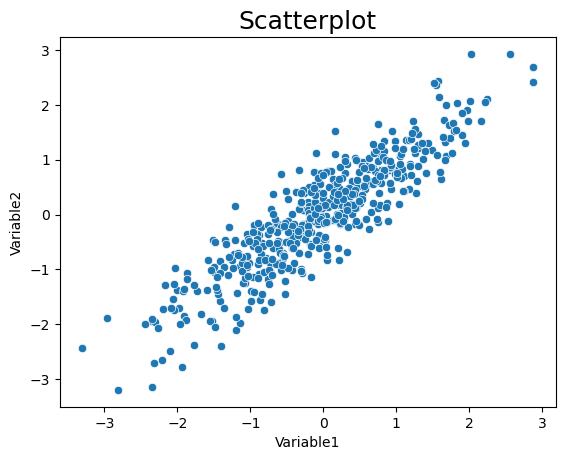

In [9]:
def simulate_xy(n=500, r=.9):
    mu = np.array([0, 0])
    cov = np.array([
        [1, r],
        [r, 1]])
    return pd.DataFrame(np.random.multivariate_normal(mu, cov, size=n), columns=['Variable1', 'Variable2'])

sns.scatterplot(data=simulate_xy(), x='Variable1', y='Variable2')
plt.title('Scatterplot', fontsize=18)

We can add regression lines with `regplot`.

Text(0.5, 1.0, 'Scatterplot')

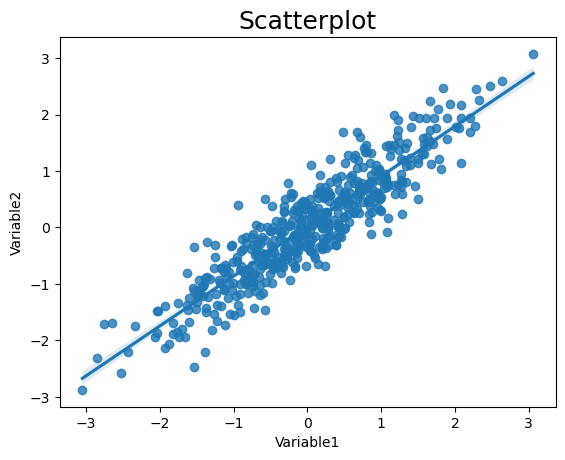

In [10]:
sns.regplot(data=simulate_xy(), x='Variable1', y='Variable2')
plt.title('Scatterplot', fontsize=18)

We can add histograms to show the distributions of x and y with `jointplot`.

Text(0.5, 1.0, 'Jointplot')

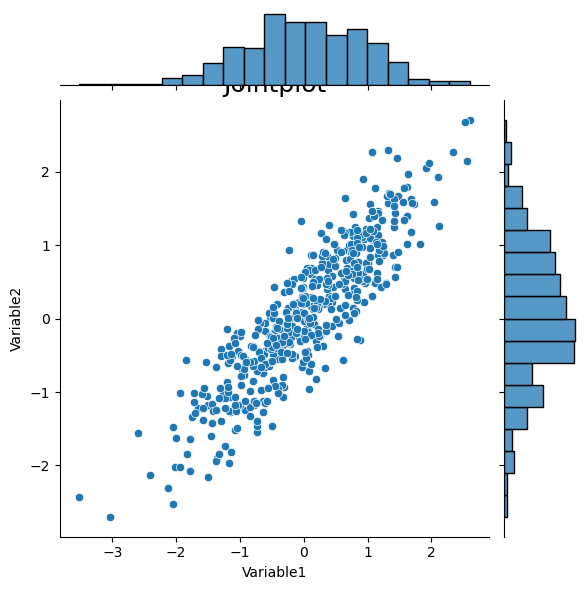

In [11]:
sns.jointplot(data=simulate_xy(), x='Variable1', y='Variable2')
plt.title('Jointplot', fontsize=18)

We can create a quick way to view relations between multiple variables using `pairplot`.

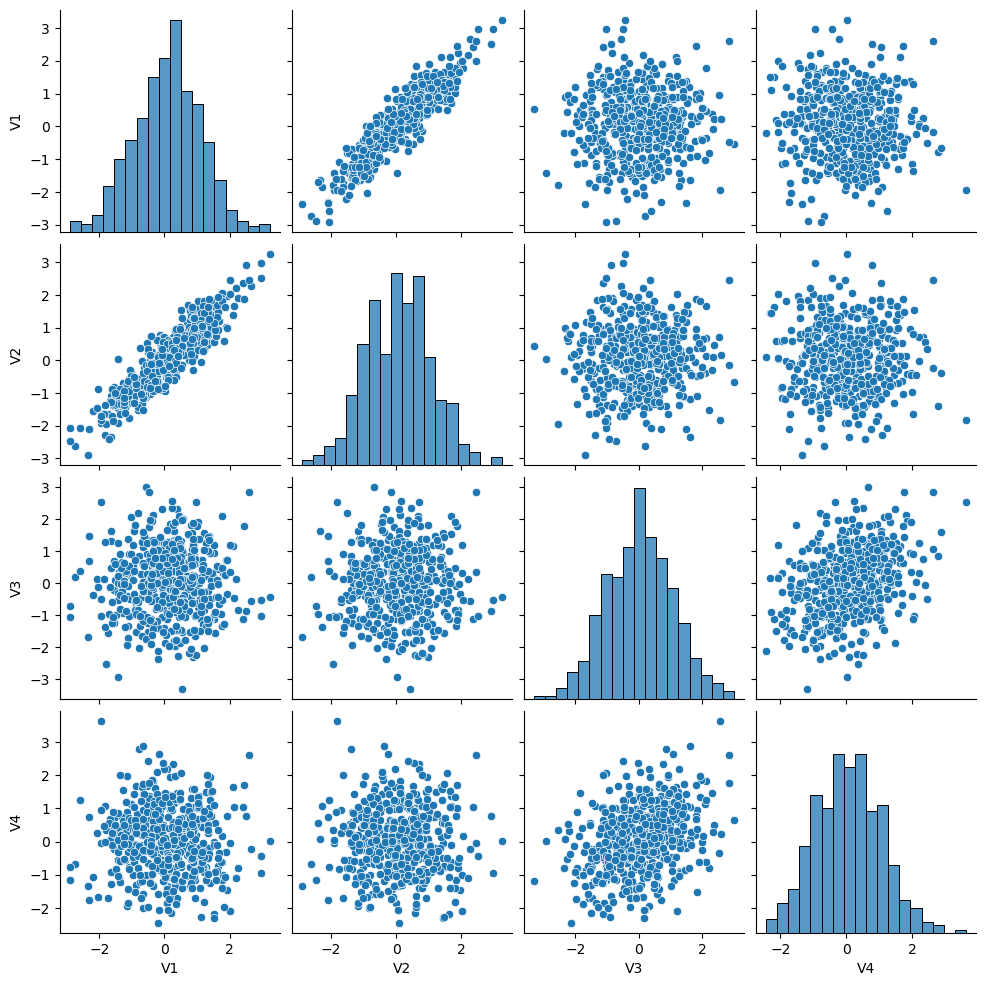

In [12]:
data = pd.concat([simulate_xy(r=.9),simulate_xy(r=.3)], axis=1)
data.columns=['V1', 'V2', 'V3', 'V4']
sns.pairplot(data=data)

### Factor plots 
Factor plots allow you to visualize the distribution of parameters in different forms such as point, bar, or violin graphs.

One important thing to note is that the data needs to be in the long format. Let's quickly simulate some data to plot.

Here are some possible values for kind : {point, bar, count, box, violin, strip}


/tmp/ipykernel_9619/3442871278.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.catplot(x='Variable', y='Data', hue='Group', data=data_long, ci=68, kind='bar')


Text(0.5, 1.0, 'Catplot')

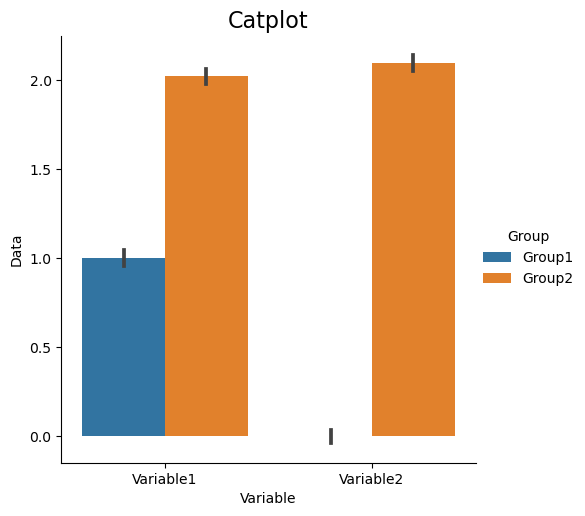

In [14]:
data1 = simulate_xy(r=.9)
data1['Group'] = 'Group1'
data1['Variable1'] = data1['Variable1'] + 1

data2 = simulate_xy(r=.3) + 2
data2['Group'] = 'Group2'

data = pd.concat([data1, data2], axis=0)
data_long = data.melt(id_vars='Group', value_vars=['Variable1', 'Variable2'], var_name='Variable', value_name='Data')

sns.catplot(x='Variable', y='Data', hue='Group', data=data_long, ci=68, kind='bar')
plt.title('Catplot', fontsize=16)

/usr/bin/anaconda3/envs/neuro/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/bin/anaconda3/envs/neuro/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/bin/anaconda3/envs/neuro/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/bin/anaconda3/envs/neuro/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 26.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/bin/anaconda3/envs/neuro/lib/python3

Text(0.5, 1.0, 'Swarmplot')

/usr/bin/anaconda3/envs/neuro/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/bin/anaconda3/envs/neuro/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/bin/anaconda3/envs/neuro/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/bin/anaconda3/envs/neuro/lib/python3.10/site-packages/seaborn/categorical.py:3540: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/bin/anaconda3/envs/neuro/lib/python

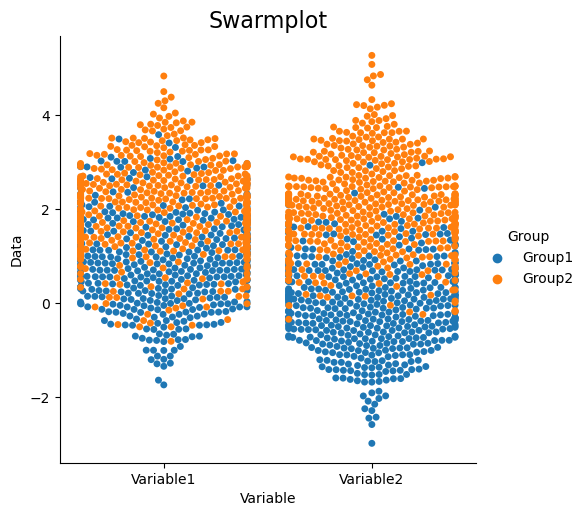

In [15]:
sns.catplot(x='Variable', y='Data', hue='Group', data=data_long, ci=68, kind='swarm')
plt.title('Swarmplot', fontsize=16)

Text(0.5, 1.0, 'Stripplot')

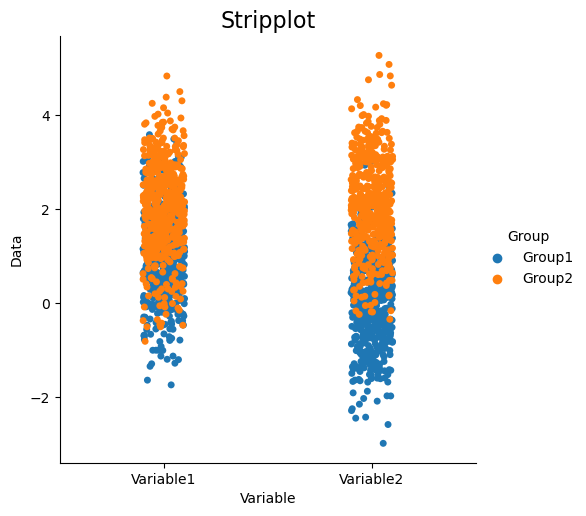

In [16]:
sns.catplot(x='Variable', y='Data', hue='Group', data=data_long, ci=68, kind='strip')
plt.title('Stripplot', fontsize=16)

Text(0.5, 1.0, 'Violinplot')

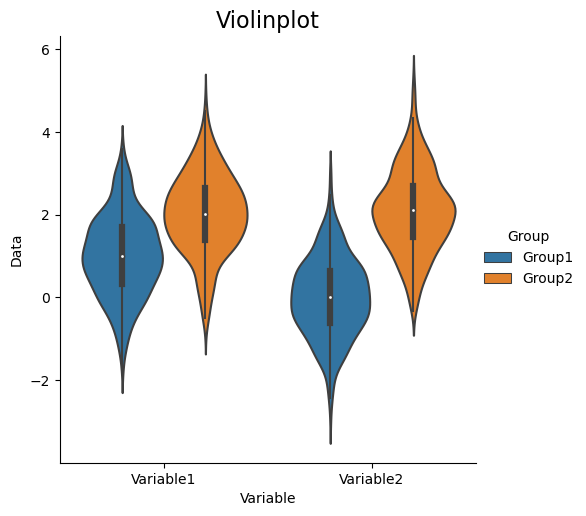

In [17]:
sns.catplot(x='Variable', y='Data', hue='Group', data=data_long, ci=68, kind='violin')
plt.title('Violinplot', fontsize=16)

### Heatmap plots 
Heatmap plots allow you to visualize matrices such as correlation matrices that show relationships across multiple variables.

Let's create a dataset with different relationships between variables. We can quickly calculate the correlation between these variables and visualize it with a heatmap

<AxesSubplot:>

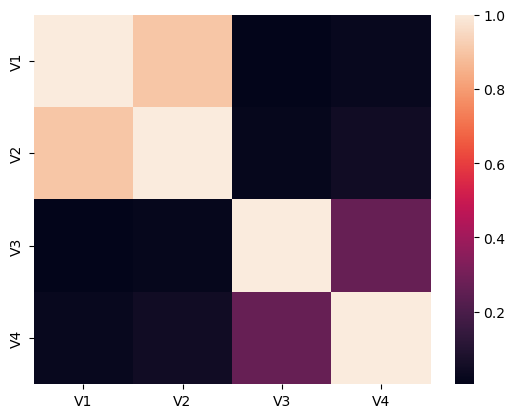

In [18]:
data = pd.concat([simulate_xy(r=.9), simulate_xy(r=.3)], axis=1)

data.columns=['V1', 'V2', 'V3', 'V4']
corr = data.corr()
sns.heatmap(data=corr)

Like all other plots, we can also customize heatmaps.

Text(0.5, 1.0, 'Correlation Matrix')

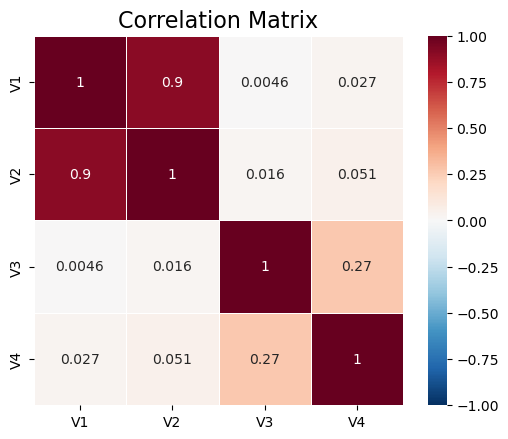

In [19]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=16)

There is also a neat type of heatmap that will also reorganize your variable based on clustering.

/usr/bin/anaconda3/envs/neuro/lib/python3.10/site-packages/seaborn/matrix.py:1221: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


Text(0.5, 1.0, 'Clustermap')

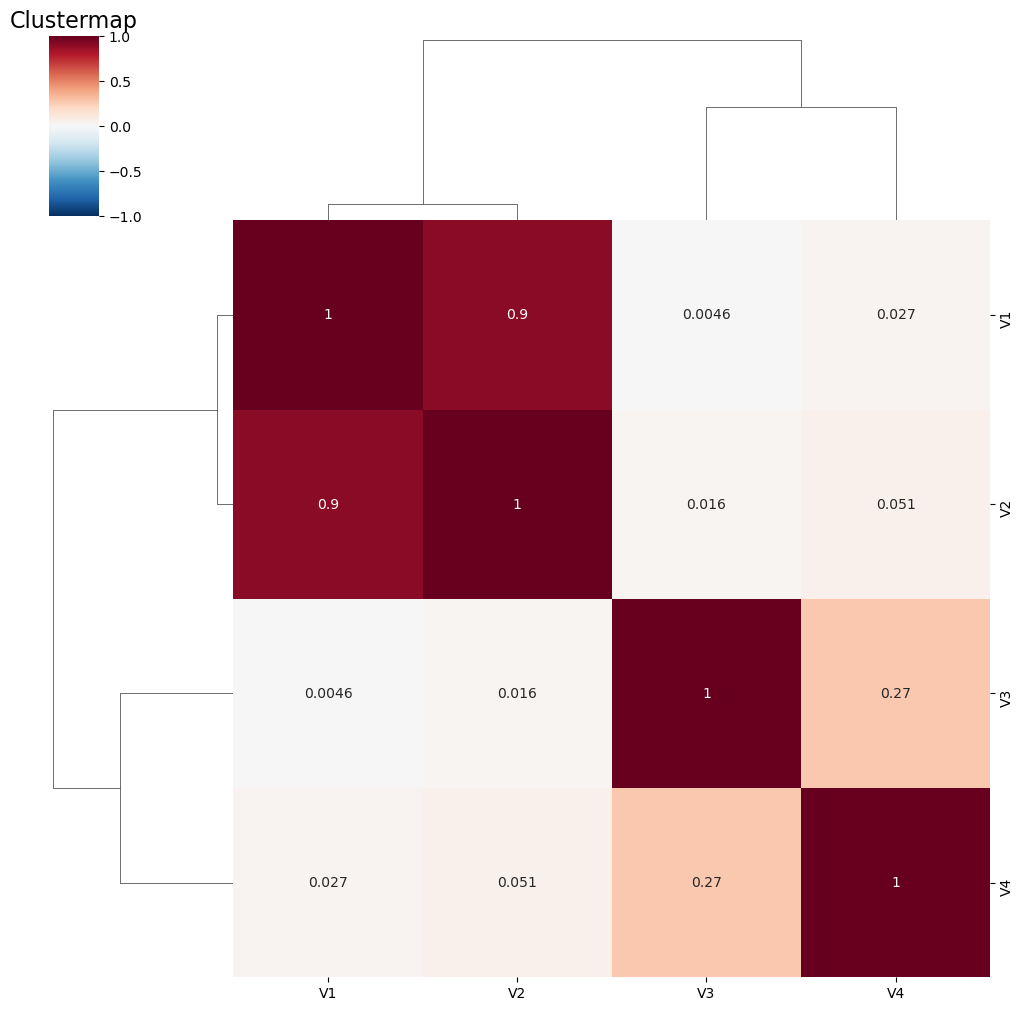

In [20]:
sns.clustermap(corr, square=True, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Clustermap', fontsize=16)

## Pandas

We introduced `Pandas` in a previous tutorial. It can also call matplotlib to quickly generate plots.

We will use the same dataset used in that tutorial to generate some plots using `pd.Dataframe`.

In [21]:
df = pd.read_csv('../data/salary.csv', sep = ',', header='infer')
df = df.dropna()
df = df[df['gender']!=2]

In [22]:
# key: We use the departm as the grouping factor. 
key = df['departm']

# Let's create an anonmyous function for calculating zscores using lambda:
# We want to standardize salary for each department.
zscore = lambda x: (x - x.mean()) / x.std()

# Now let's calculate zscores separately within each department
transformed = df.groupby(key).transform(zscore)
df['salary_in_departm'] = transformed['salary']

Now we have `salary_in_departm` column showing standardized salary per department.


<AxesSubplot:title={'center':'salary'}, xlabel='[gender]'>

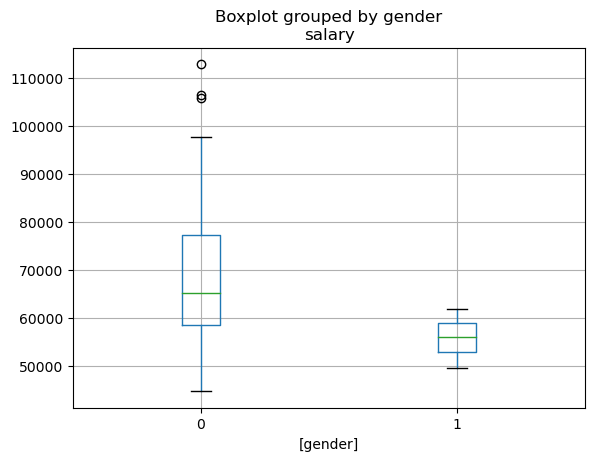

In [23]:
df[['salary','gender']].boxplot(by='gender')

### Scatterplot

<AxesSubplot:xlabel='years', ylabel='salary'>

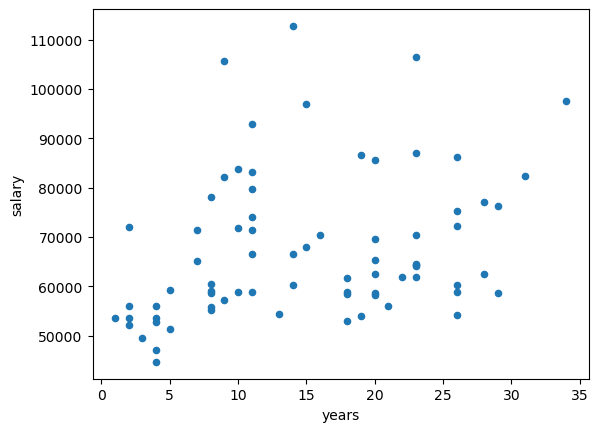

In [24]:
df[['salary', 'years']].plot(kind='scatter', x='years', y='salary')

Now plot all four categories

KeyError: 'dept_num'

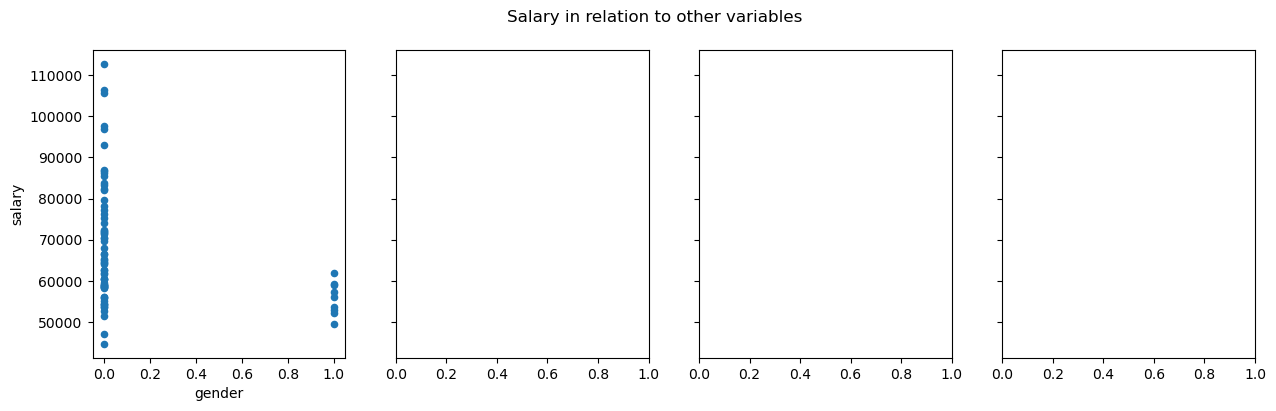

In [26]:
f, axs = plt.subplots(1, 4, sharey=True)
f.suptitle('Salary in relation to other variables')
df.plot(kind='scatter', x='gender', y='salary', ax=axs[0], figsize=(15, 4))
df.plot(kind='scatter', x='dept_num', y='salary', ax=axs[1])
df.plot(kind='scatter', x='years', y='salary', ax=axs[2])
df.plot(kind='scatter', x='age', y='salary', ax=axs[3])

The problem is that it treats department as a continuous variable. 

### Generating bar - errorbar plots in Pandas

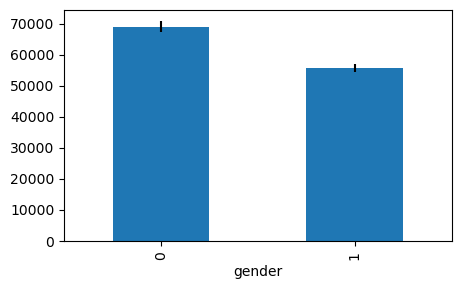

In [27]:
means = df.groupby('gender').mean()['salary']
errors = df.groupby('gender').std()['salary'] / np.sqrt(df.groupby('gender').count()['salary'])
ax = means.plot.bar(yerr=errors,figsize=(5,3))

## Interactive Plots
Interactive data visualizations are an exciting development and are likely to continue to grow in popularity with the rapid developments in web frontend frameworks. Covering these libraries is beyond the scope of this tutorial, but I highly encourage you to check them out. Some of them are surprisingly easy to use and make exploring your data and sharing your results much more fun.

It is possible to add some basic interactivity to the plotting libraries covered in this tutorial in jupyter notebooks with [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/). You will see a few examples of this in other tutorials.

### Plotly
[Plotly](https://plotly.com/python/) is an graphing library to make interactive plots.

### Bokeh
[Bokeh](https://docs.bokeh.org/en/latest/index.html) is an interactive visualization library
    
### Altair
[Altair](https://altair-viz.github.io/) is a declarative statistical visualization library for Python based on Vega


## Exercises 
The following exercises uses the dataset "salary_exercise.csv" adapted from material available [here](http://data.princeton.edu/wws509/datasets/#salary)

These are the salary data used in Weisberg's book, consisting of observations on six variables for 52 tenure-track professors in a small college. The variables are:

 - sx = Sex, coded 1 for female and 0 for male
 - rk = Rank, coded
 - 1 for assistant professor,
 - 2 for associate professor, and
 - 3 for full professor
 - yr = Number of years in current rank
 - dg = Highest degree, coded 1 if doctorate, 0 if masters
 - yd = Number of years since highest degree was earned
 - sl = Academic year salary, in dollars.

Reference: S. Weisberg (1985). Applied Linear Regression, Second Edition. New York: John Wiley and Sons. Page 194.


### Exercise 1
Recreate the plot shown in figure.   
On the left is a correlation of all parameters of only the male professors.  
On the right is the same but only for female professors.   
The colormap code used is `RdBu_r`. Read the Docstrings on sns.heatmap or search the internet to figure out how to change the colormap, scale the colorbar, and create square line boundaries.   
Place titles for each plot as shown, and your name as the main title.   

![](../images/plotting/hw2-3.png)

### Exercise 2
Recreate the following plot from the salary_exercise.csv dataset.   
Create a 1 x 2 subplot.   
On the left is a bar-errorbar of salary per gender.   
On the right is a scatterplot of salary on y-axis and years in rank on the x-axis.  
Set the axis limits as shown in the picture and modify their lables.   
Add axis label names.   
Add a legend for the scatterplot and place it at a bottom-right location.  
Add your name as the main title of the plot.   

![](../images/plotting/hw2-4.png)